# Hierarchical Clustering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [1]:
%load_ext autoreload
%autoreload 2

TODO: Studiare meglio i tagli e vedere poi con gli scatter plot

In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import fcluster

In [3]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
# Select relevant columns for clustering
columns_to_use = ['length', 'race_prestige', 'race_physical_effort']
dataset = dataset[columns_to_use].drop_duplicates()

### Races Clustering

In [4]:
data_for_clustering = dataset.dropna() #TODO: remove when we have imputed the missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

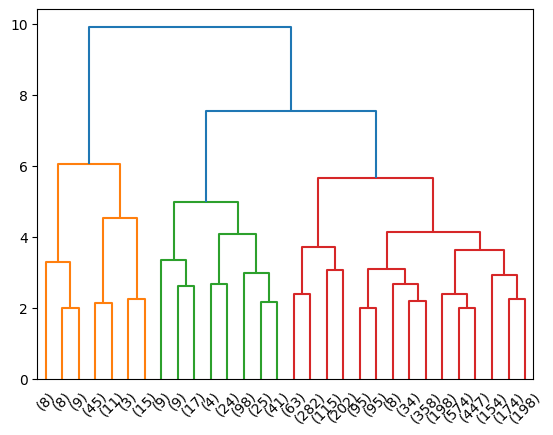

In [5]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [6]:
cluster_labels = fcluster(data_link, t=7.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.386369290450654)

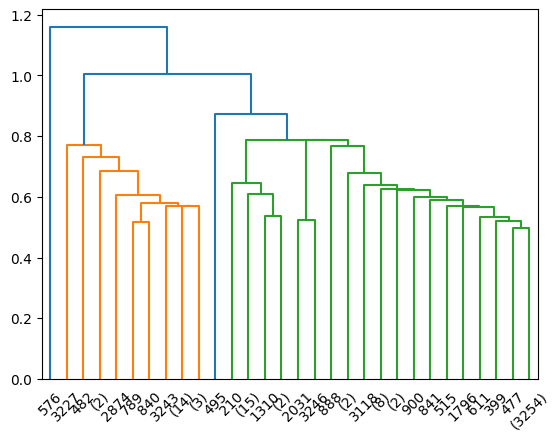

In [7]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [8]:
cluster_labels = fcluster(data_link, t=0.8, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.5612625677975522)

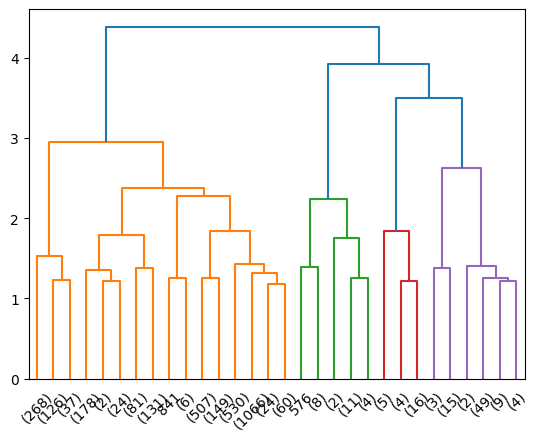

In [9]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [10]:
cluster_labels = fcluster(data_link, t=2.8, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.3904265242797588)

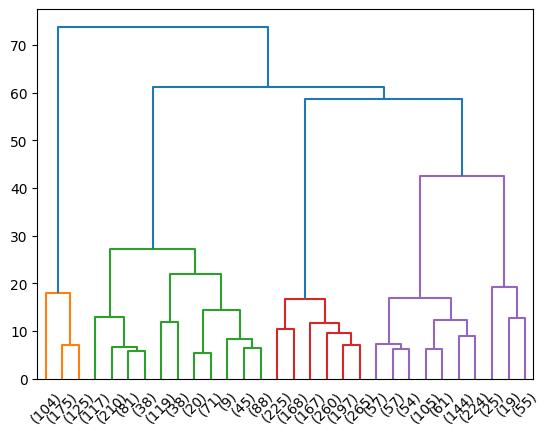

In [11]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [12]:
cluster_labels = fcluster(data_link, t=45, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.4078866237140772)

### Races-Cyclist Clustering

In [13]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset = dataset[dataset['race_name'] == 'Ronde van Vlaanderen']

In [14]:
# Select relevant columns for clustering
columns_to_use = ['length','race_prestige', 'race_physical_effort', 'cyclist_bmi', 'cyclist_age', 'height', 'cyclist_climb_power', 'position', 'delta']

data_for_clustering = dataset[columns_to_use].dropna() #TODO: remove when we have imputed the missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

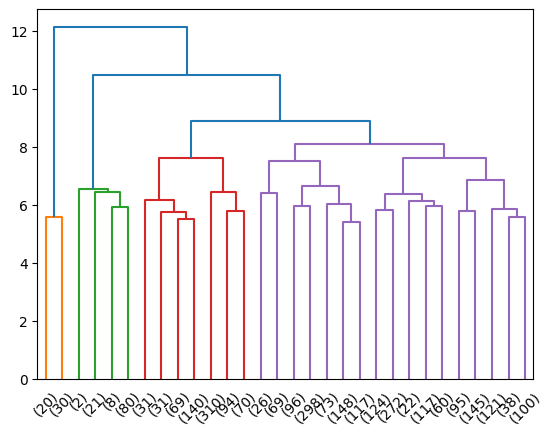

In [15]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [16]:
cluster_labels = fcluster(data_link, t=8.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.11701013166964418)

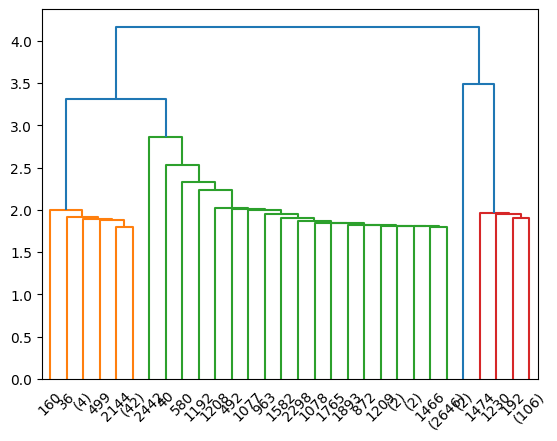

In [17]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [18]:
cluster_labels = fcluster(data_link, t=3.2, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.44634918379262395)

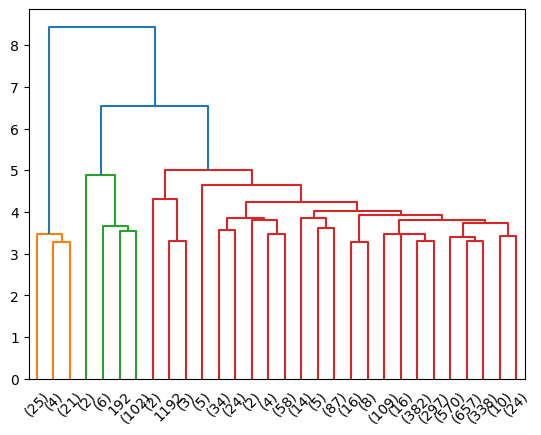

In [19]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [20]:
cluster_labels = fcluster(data_link, t=5.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.45465956961053805)

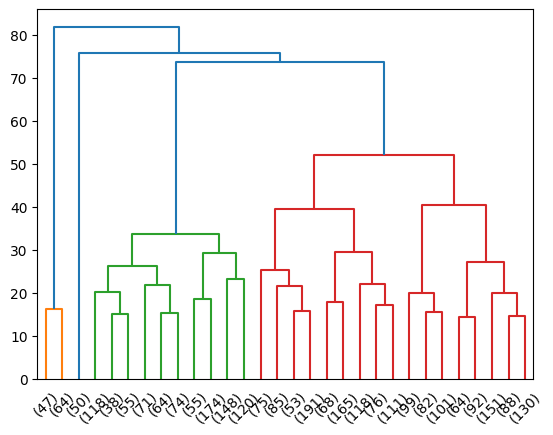

In [21]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [22]:
cluster_labels = fcluster(data_link, t=75, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.45465956961053805)